In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('delivery_time.csv')

In [5]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.isnull().sum()

,0
Delivery Time,0
Sorting Time,0


In [10]:
correlation_matrix = df.corr()
correlation_matrix

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


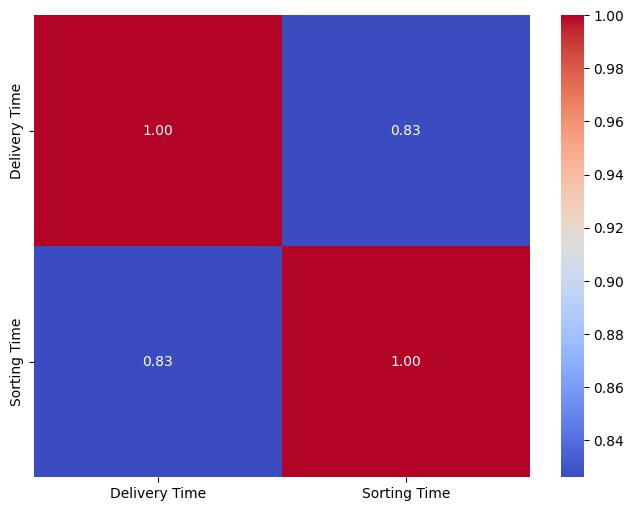

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

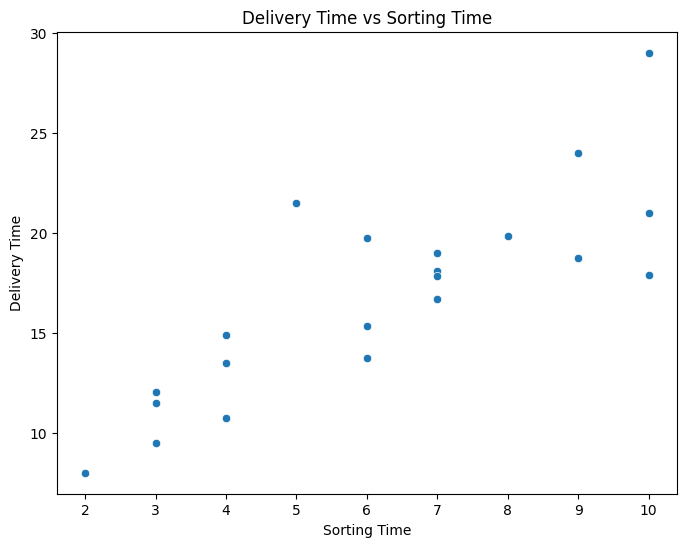

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=df)
plt.title('Delivery Time vs Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


In [15]:
X = df[['Sorting Time']]
y = df['Delivery Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Mean Squared Error: 14.04673895663505
R-squared: -1.020759958636741
Intercept: 4.682297962052003
Coefficient: 2.024244553759663


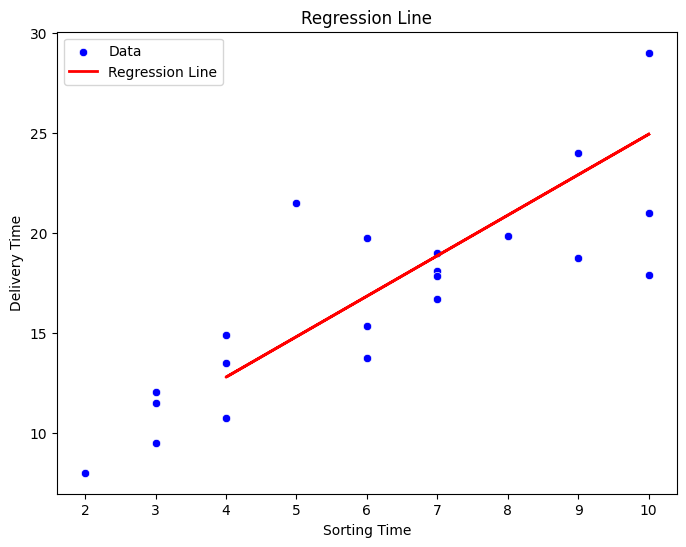

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=df, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()
